<a href="https://colab.research.google.com/github/Soohyun13/MID6/blob/jiyoung/MIDPROJECT_6%ED%8C%80_%EC%B5%9C%EC%A7%80%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **교육 분야 : 학생 성적 요인 분석**

<간단 흐름> <br>
주제 설정 -> 각자 가설 설정하여 공유 -> 다음 모임까지 EDA와 시각화 수행 / 추가 인사이트 등 공유

※ 어려움(미해결 등) 발생하여도 그대로 공유

**데이터 불러오기**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/xAPI-Edu-Data.csv')

**데이터 변환**
- 성적 데이터 H, M, L 을 각각 1등급, 2등급, 3등급으로 임의 변환

In [ ]:
df['Class'] = df['Class'].replace({'H': 1, 'M': 2, 'L': 3})
df

<ipython-input-3-47322694845d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace({'H': 1, 'M': 2, 'L': 3})


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,3
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,3
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,3
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,2
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,2
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,3


In [ ]:
# 데이터 확인
count_1 = (df['Class'] == 1).sum()
count_2 = (df['Class'] == 2).sum()
count_3 = (df['Class'] == 3).sum()

print(count_1)
print(count_2)
print(count_3)

142
211
127


## 결측치 확인 - 없음

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

## 이상치 확인 - 이상치라고 판단할 수 있을까?

- 'raisedhands', 'VisITedResources'를 거의 하지 않는건 충분히 가능하다고 봄 - 이상치로 판단 X
- 너무 많이 하는건?? 횟수가 제한되어 있지 않다면 이도 충분히 가능하다고 봄 - 이상치로 판단 X
  - ex. 손을 들 수 있는 기회가 총 10번인데 20번 손을 들었다고 하면 이는 이상치겠지만 지금의 자료만으로는 확인할 수 없다.
  - 공지사항 확인, 리소스 방문(자료 열기)에 제한이 있을 것 같지 않음

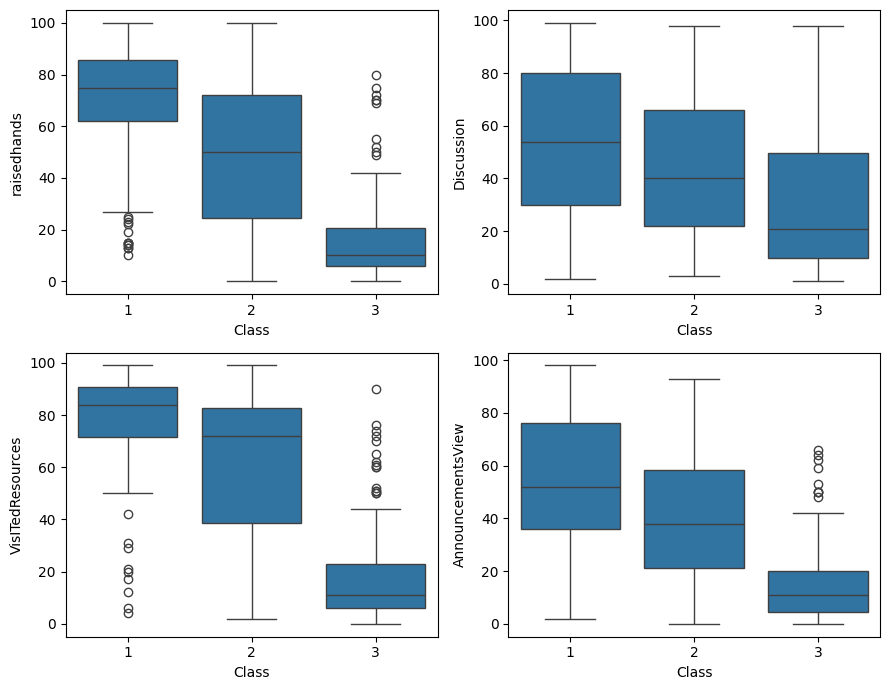

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(9, 7))

sns.boxplot(x='Class', y='raisedhands', data=df, ax=axes[0, 0])
sns.boxplot(x='Class', y='Discussion', data=df, ax=axes[0, 1])
sns.boxplot(x='Class', y='VisITedResources', data=df, ax=axes[1, 0])
sns.boxplot(x='Class', y='AnnouncementsView', data=df, ax=axes[1, 1])

plt.tight_layout()
plt.show()

## **가설** ~ **학습 참여도와 성적** ~

- 학교, 수업에 대한 참여도를 ‘손 들기’, ‘방문한 리소스’, ‘공지 사항 보기’, ‘토론 그룹’, ‘결석 일수’로 확인
- 이 중 [‘손 들기’, ’토론 그룹’], [‘방문한 리소스’,’공지 사항 보기’] 두 분류로 나누어 보고자 함
    
     ※ “전자가 상대적으로 적극적인 학습 참여다”라는 개인적인 판단 하에 가설 설정
    
<가설설정> <br>
1. 결석이 적을수록 학생의 성적이 높다.
2. 교실에서 손을 많이 들수록, 토론 그룹 참여가 많을수록 학생 성적이 더 높다.

      - 코스내용↔공지사항 확인 / 손들기↔토론 참여 각각의 상관관계도 확인해보기

### 가설1. 결석이 적을수록 학생의 성적이 높다.

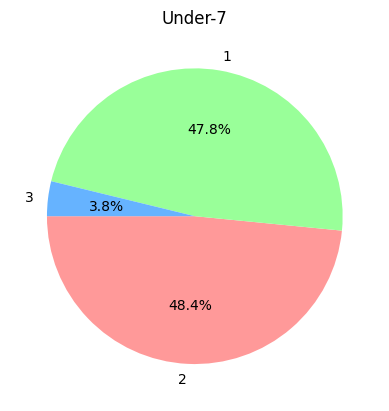

In [ ]:
df_under7 = df[df['StudentAbsenceDays'] == 'Under-7']

category_counts = df_under7['Class'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=-180, colors=['#ff9999','#99ff99','#66b3ff'])  # 순서대로 빨강, 초록, 파랑

plt.title('Under-7')

plt.show()

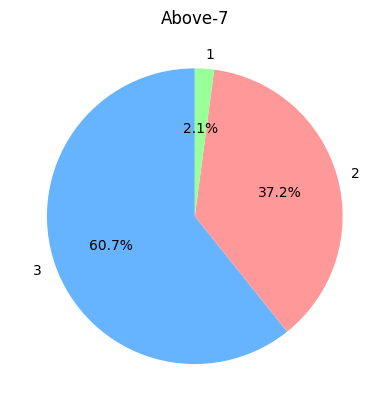

In [ ]:
df_above7 = df[df['StudentAbsenceDays'] == 'Above-7']

category_counts = df_above7['Class'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999','#99ff99'])

plt.title('Above-7')

plt.show()

In [ ]:
# 데이터 확인
Absence_above = (df['StudentAbsenceDays'] == 'Above-7').sum()
Absence_under = (df['StudentAbsenceDays'] == 'Under-7').sum()

print(Absence_above)
print(Absence_under)

191
289


In [ ]:
filtered_df = df[(df['StudentAbsenceDays'] == 'Under-7') & (df['Class'] == 1)][['StudentAbsenceDays', 'Class']]
filtered_df

,StudentAbsenceDays,Class
10,Under-7,1
19,Under-7,1
30,Under-7,1
47,Under-7,1
48,Under-7,1
...,...,...
459,Under-7,1
464,Under-7,1
465,Under-7,1
466,Under-7,1


> 가설1. 결석이 적을수록 학생의 성적이 높다. (채택)

In [ ]:
import statsmodels.api as sm
from statsmodels.tools import add_constant
from scipy import stats

contingency_table = pd.crosstab(df['StudentAbsenceDays'], df['Class'])

# 카이제곱 검정
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('카이제곱 검정 결과:')
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("✅ 출석 일수와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)")
else:
    print("❌ 출석 일수와 성적 간에 통계적으로 유의미한 관계가 존재하지 않음 (p >= 0.05)")

카이제곱 검정 결과:
Chi-Square Test Statistic: 225.20481950881492
p-value: 1.2513960927832126e-49
✅ 출석 일수와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)


#### 샘플링 (사용 X)

In [ ]:
from sklearn.utils import resample

df2 = pd.read_csv('/content/xAPI-Edu-Data.csv')
df2 = df2.drop(columns=['NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester'])

# 수치화
df2['gender'] = df2['gender'].map({'M': 1, 'F': 2})
df2['Relation'] = df2['Relation'].map({'Father': 1, 'Mum': 2})
df2['ParentAnsweringSurvey'] = df2['ParentAnsweringSurvey'].map({'No': 0, 'Yes': 1})
df2['ParentschoolSatisfaction'] = df2['ParentschoolSatisfaction'].map({'Bad': 0, 'Good': 1})
df2['StudentAbsenceDays'] = df2['StudentAbsenceDays'].map({'Under-7': 6, 'Above-7': 7})  # 타겟 변수
df2['Class'] = df2['Class'].map({'H': 1, 'M': 2, 'L': 3})

# 데이터 분리
Abs_above7 = df2[df2['StudentAbsenceDays'] == 7] # 191개
Abs_under7 = df2[df2['StudentAbsenceDays'] == 6] # 289개

# 언더샘플링
Abs_undersample = resample((Abs_under7), replace=True, n_samples=len(Abs_above7), random_state=0)

# 데이터 합치기
df_undersample = pd.concat([Abs_above7, Abs_undersample])
df_undersample

,gender,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
2,1,1,10,7,0,30,0,0,7,3
3,1,1,30,25,5,35,0,0,7,3
4,1,1,40,50,12,50,0,0,7,2
5,2,1,42,30,13,70,1,0,7,2
6,1,1,35,12,0,17,0,0,7,3
...,...,...,...,...,...,...,...,...,...,...
293,2,2,62,64,72,84,1,1,6,1
254,1,1,59,97,42,70,1,1,6,1
62,1,2,80,90,70,80,1,1,6,1
131,1,1,80,42,20,50,1,1,6,2


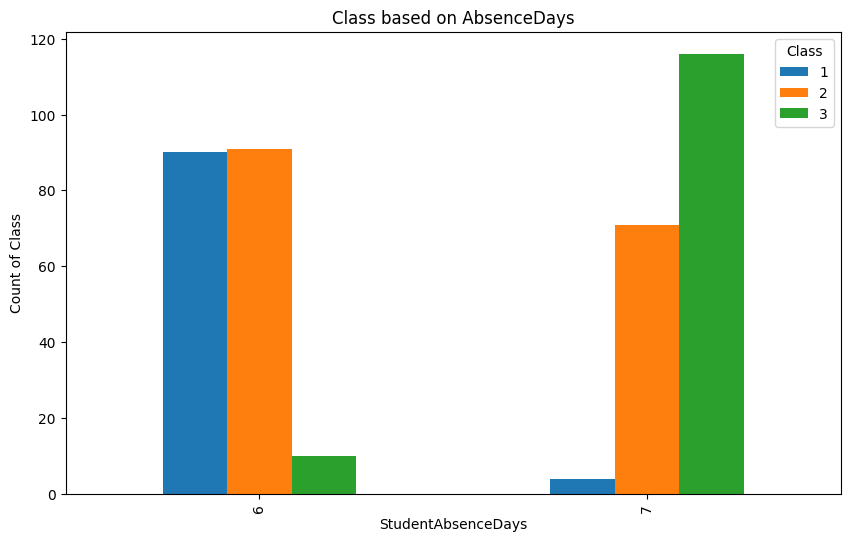

In [ ]:
count_data = df_undersample.groupby(['StudentAbsenceDays', 'Class']).size().unstack(fill_value=0)

# 막대그래프
count_data.plot(kind='bar', stacked=False, figsize=(10, 6))

# 그래프 제목 및 레이블 추가
plt.title('Class based on AbsenceDays')
plt.xlabel('StudentAbsenceDays')
plt.ylabel('Count of Class')

plt.show()

In [ ]:
# 오버샘플링
Abs_oversample = resample((Abs_above7), replace=True, n_samples=len(Abs_under7), random_state=0)

# 데이터 합치기
df_oversample = pd.concat([Abs_under7, Abs_oversample])
df_oversample

,gender,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,1,15,16,2,20,1,1,6,2
1,1,1,20,20,3,25,1,1,6,2
7,1,1,50,10,15,22,1,1,6,2
8,2,1,12,21,16,50,1,1,6,2
9,2,1,70,80,25,70,1,1,6,2
...,...,...,...,...,...,...,...,...,...,...
423,2,2,74,62,49,43,1,1,7,2
285,1,1,41,39,35,39,1,0,7,2
70,1,1,22,30,10,12,1,1,7,3
443,1,2,70,76,65,70,1,1,7,2


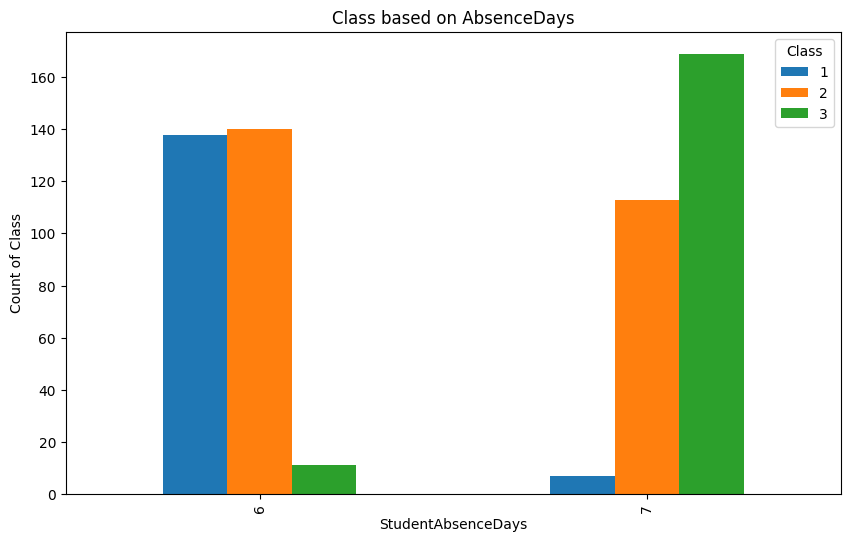

In [ ]:
count_data = df_oversample.groupby(['StudentAbsenceDays', 'Class']).size().unstack(fill_value=0)

# 막대그래프
count_data.plot(kind='bar', stacked=False, figsize=(10, 6))

# 그래프 제목 및 레이블 추가
plt.title('Class based on AbsenceDays')
plt.xlabel('StudentAbsenceDays')
plt.ylabel('Count of Class')

plt.show()

In [ ]:
# SMOTE
X = df2.drop(columns=['StudentAbsenceDays'])
y = df2['StudentAbsenceDays']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['StudentAbsenceDays'] = y_resampled

# 결과 확인
resampled_df

,gender,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,Class,StudentAbsenceDays
0,1,1,15,16,2,20,1,1,2,6
1,1,1,20,20,3,25,1,1,2,6
2,1,1,10,7,0,30,0,0,3,7
3,1,1,30,25,5,35,0,0,3,7
4,1,1,40,50,12,50,0,0,2,7
...,...,...,...,...,...,...,...,...,...,...
573,1,1,8,8,10,10,0,0,2,7
574,1,1,76,83,79,75,1,1,1,7
575,1,1,80,83,79,78,1,1,2,7
576,1,1,3,5,4,6,0,0,3,7


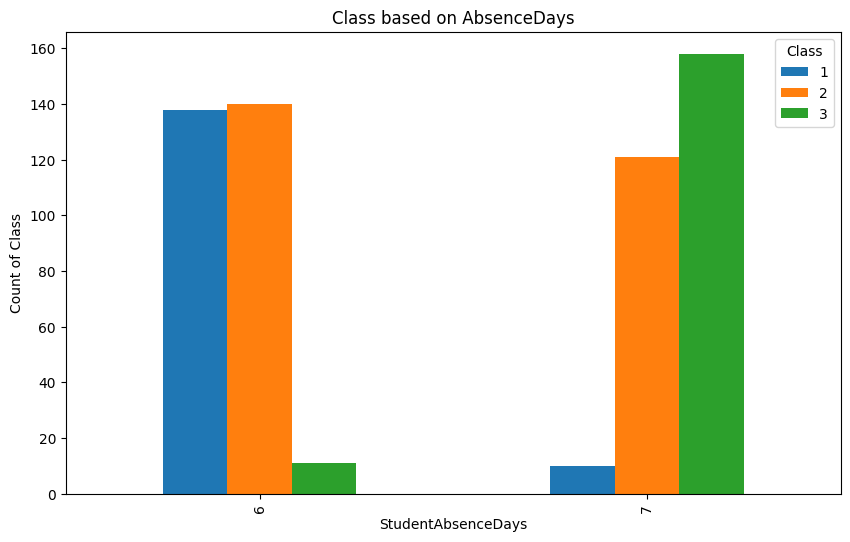

In [ ]:
count_data = resampled_df.groupby(['StudentAbsenceDays', 'Class']).size().unstack(fill_value=0)

# 막대그래프
count_data.plot(kind='bar', stacked=False, figsize=(10, 6))

# 그래프 제목 및 레이블 추가
plt.title('Class based on AbsenceDays')
plt.xlabel('StudentAbsenceDays')
plt.ylabel('Count of Class')

plt.show()

-----------------
### 가설2. 교실에서 손을 많이 들수록, 토론 그룹 참여가 많을수록 학생 성적이 더 높다.

In [ ]:
corr_col = df[['raisedhands','Discussion', 'VisITedResources','AnnouncementsView','Class']].corr()['Class']

# 숫자로만 보면 1이 3보다 작으므로 상관계수가 음수로 출력 / 절대값 처리

corr_abs = corr_col.abs()
corr_abs

,Class
raisedhands,0.646298
Discussion,0.308183
VisITedResources,0.677094
AnnouncementsView,0.527370
Class,1.000000


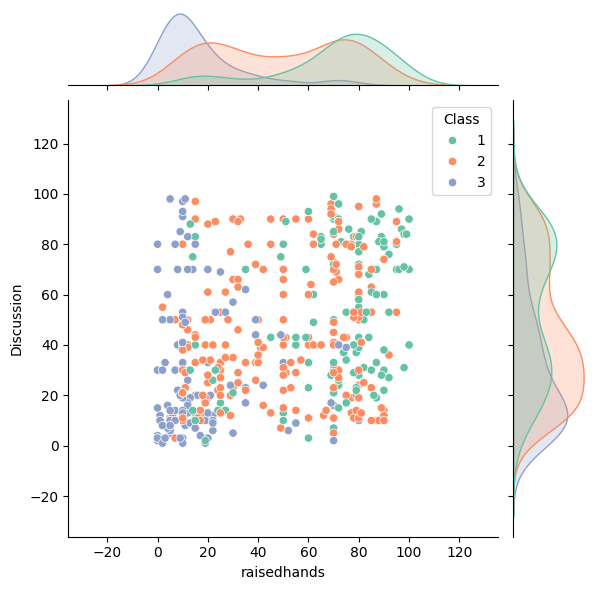

In [ ]:
sns.jointplot(x='raisedhands', y='Discussion', data=df, kind='scatter', hue='Class', hue_order=[1, 2, 3], palette='Set2')
plt.show()

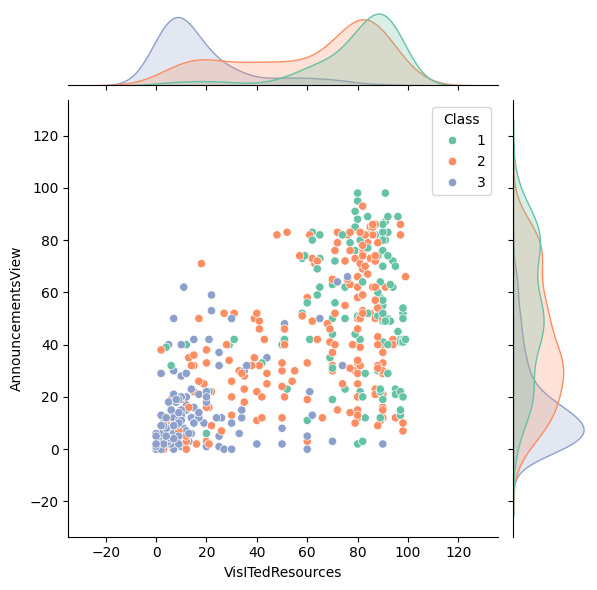

In [ ]:
sns.jointplot(x='VisITedResources', y='AnnouncementsView', data=df, kind='scatter', hue='Class', hue_order=[1, 2, 3], palette='Set2')
plt.show()

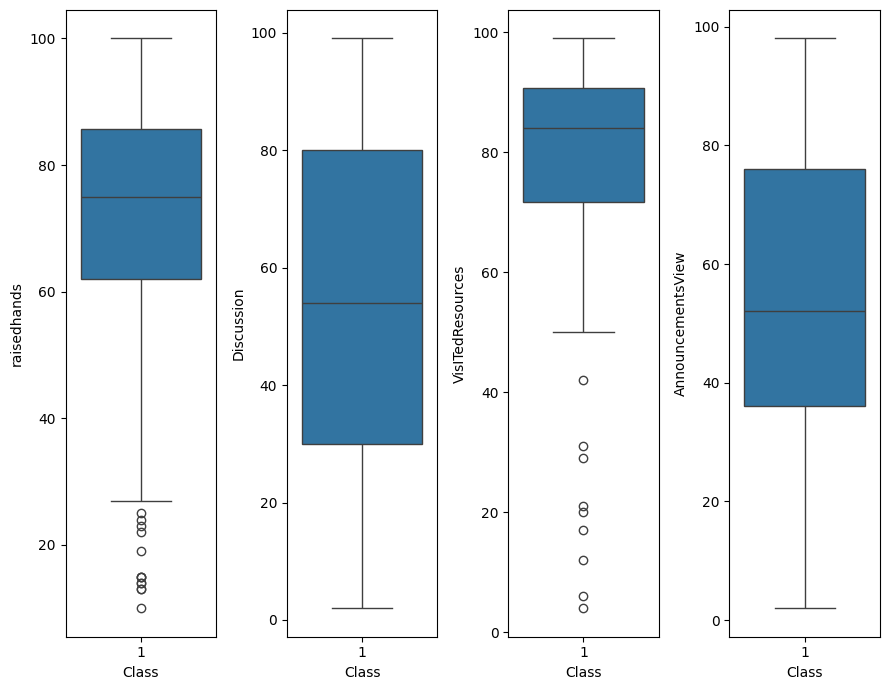

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(9, 7))

# 성적 필터링
df_class = df[df['Class'] == 1]

sns.boxplot(x='Class', y='raisedhands', data=df_class, ax=axes[0])
sns.boxplot(x='Class', y='Discussion', data=df_class, ax=axes[1])
sns.boxplot(x='Class', y='VisITedResources', data=df_class, ax=axes[2])
sns.boxplot(x='Class', y='AnnouncementsView', data=df_class, ax=axes[3])

plt.tight_layout()
plt.show()

> 가설2. 교실에서 손을 많이 들수록, 토론 그룹 참여가 많을수록 학생 성적이 더 높다. (기각) <br>
▶ 교실에서 손을 많이 들수록, **리소스 방문(자료 확인)**이 많을수록 학생 성적이 더 높다. <br>


위 두가지 조건은 전체 <학습 참여> 변수 4개 중 상대적으로 높은 상관계수를 보이는 것일 뿐 절대적으로 강한 상관관계를 보이는 것은 아님을 주의

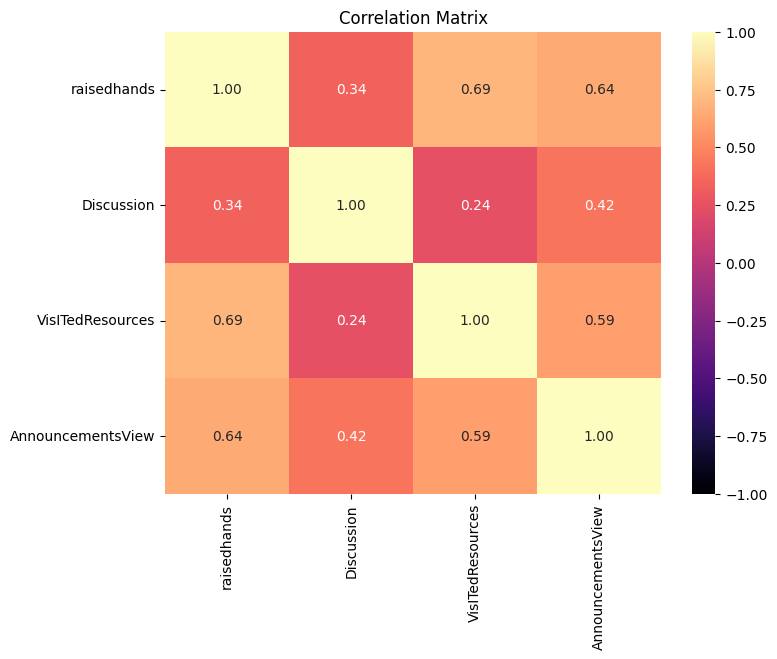

In [ ]:
# (참고) 변수 간의 상관계수 히트맵
# 'raisedhands','Discussion','VisITedResources','AnnouncementsView'
df_select = df[['raisedhands','Discussion', 'VisITedResources','AnnouncementsView']]

corr_matrix = df_select.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()

#### (참고) 검증에 대한 ChatGPT 설명

In [ ]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

# 독립변수와 종속변수 설정
X = df["VisITedResources"]  # 연속형 독립변수
X = add_constant(X)  # 절편 추가
Y = df["Class"]  # 범주형 종속변수 (1, 2, 3)

# 다항 로지스틱 회귀 모델 생성 및 적합
model = sm.MNLogit(Y, X)
result = model.fit()

# 결과 출력
print(result.summary())

# 유의미한 차이가 있는지 확인 (p-value 확인)
p_values = result.pvalues.iloc[1]  # VisITedResources의 p-value 가져오기
if p_values.min() < 0.05:
    print("✅ VisITedResources에 따른 Class 차이가 통계적으로 유의미함 (p < 0.05)")
else:
    print("❌ VisITedResources에 따른 Class 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")

Optimization terminated successfully.
         Current function value: 0.778777
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                  Class   No. Observations:                  480
Model:                        MNLogit   Df Residuals:                      476
Method:                           MLE   Df Model:                            2
Date:                Fri, 21 Mar 2025   Pseudo R-squ.:                  0.2745
Time:                        07:18:26   Log-Likelihood:                -373.81
converged:                       True   LL-Null:                       -515.24
Covariance Type:            nonrobust   LLR p-value:                 3.809e-62
         Class=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6919      0.431      6.252      0.000       1.848       3.536
VisITedReso

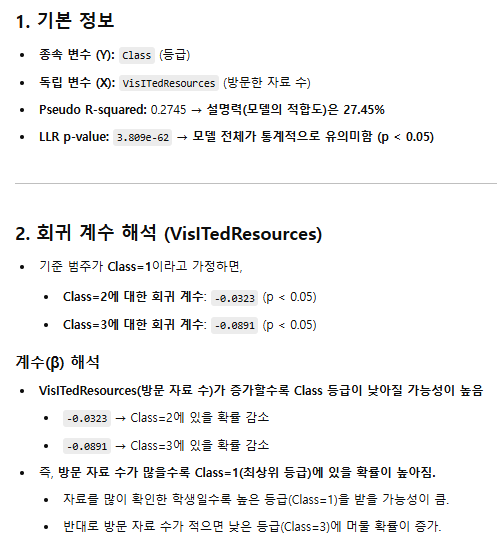
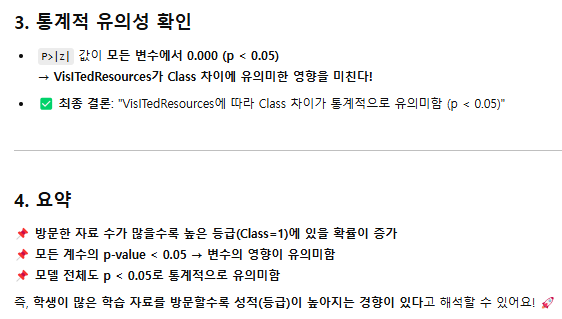

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant

# 독립변수와 종속변수 설정
X = df["Discussion"]  # 연속형 독립변수
X = add_constant(X)  # 절편 추가
Y = df["Class"]  # 범주형 종속변수 (1, 2, 3)

# 다항 로지스틱 회귀 모델 생성 및 적합
model = sm.MNLogit(Y, X)
result = model.fit()

# 결과 출력
print(result.summary())

# 유의미한 차이가 있는지 확인 (p-value 확인)
p_values = result.pvalues.iloc[1]  # VisITedResources의 p-value 가져오기
if p_values.min() < 0.05:
    print("✅ Discussion 따른 Class 차이가 통계적으로 유의미함 (p < 0.05)")
else:
    print("❌ Discussion 따른 Class 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")

Optimization terminated successfully.
         Current function value: 1.022829
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                  Class   No. Observations:                  480
Model:                        MNLogit   Df Residuals:                      476
Method:                           MLE   Df Model:                            2
Date:                Fri, 21 Mar 2025   Pseudo R-squ.:                 0.04712
Time:                        07:18:29   Log-Likelihood:                -490.96
converged:                       True   LL-Null:                       -515.24
Covariance Type:            nonrobust   LLR p-value:                 2.858e-11
   Class=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0266      0.226      4.536      0.000       0.583       1.470
Discussion    -0.0130      0.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant

# 독립변수와 종속변수 설정
X = df["AnnouncementsView"]  # 연속형 독립변수
X = add_constant(X)  # 절편 추가
Y = df["Class"]  # 범주형 종속변수 (1, 2, 3)

# 다항 로지스틱 회귀 모델 생성 및 적합
model = sm.MNLogit(Y, X)
result = model.fit()

# 결과 출력
print(result.summary())

# 유의미한 차이가 있는지 확인 (p-value 확인)
p_values = result.pvalues.iloc[1]  # VisITedResources의 p-value 가져오기
if p_values.min() < 0.05:
    print("✅ AnnouncementsView 따른 Class 차이가 통계적으로 유의미함 (p < 0.05)")
else:
    print("❌ AnnouncementsView 따른 Class 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")

Optimization terminated successfully.
         Current function value: 0.888173
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                  Class   No. Observations:                  480
Model:                        MNLogit   Df Residuals:                      476
Method:                           MLE   Df Model:                            2
Date:                Fri, 21 Mar 2025   Pseudo R-squ.:                  0.1726
Time:                        07:18:31   Log-Likelihood:                -426.32
converged:                       True   LL-Null:                       -515.24
Covariance Type:            nonrobust   LLR p-value:                 2.430e-39
          Class=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3331      0.245      5.452      0.000       0.854       1.812
Announce

## **가설** ~ **보호자와 성적** ~

- ‘학생에 대한 책임이 있는 부모’는 평소 학생과 많이 소통하는 쪽 혹은 한부모 가정일 경우라면 유일한 보호자를 판단할 수 있는 지표라 생각
- ‘학부모의 설문 참여도’ 보다는 ‘만족도’로 학생의 성적과의 상관관계를 보일 수 있으리라 생각
    
    ※ 학부모는 학생이 학습하기 좋은 환경을 만족해할 것이라는 전제 하에 가설 설정
    
<가설설정> <br>
1. 책임이 있는 부모가 엄마로 입력되어 있는 학생의 성적이 더 높다.

2. 학부모가 학교에 만족할수록 학생 성적이 높다.

### 가설1. 책임이 있는 부모가 엄마로 입력되어 있는 학생의 성적이 더 높다.

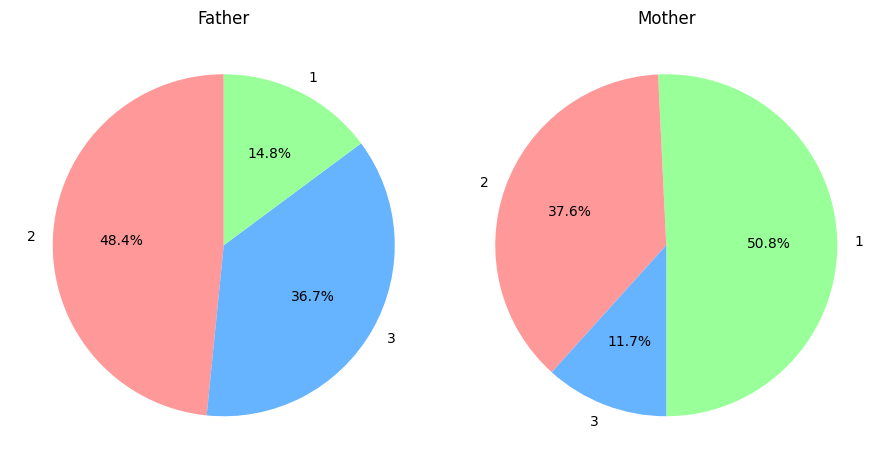

In [ ]:
df_male = df[df['Relation'] == 'Father']
df_female = df[df['Relation'] == 'Mum']

category_counts_male = df_male['Class'].value_counts()
category_counts_female = df_female['Class'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(9, 7))

# 아버지 파이 차트
axes[0].pie(category_counts_male, labels=category_counts_male.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
axes[0].set_title('Father')

# 어머니 파이 차트
axes[1].pie(category_counts_female, labels=category_counts_female.index, autopct='%1.1f%%', startangle=-90, colors=['#99ff99', '#ff9999', '#66b3ff'])
axes[1].set_title('Mother')

plt.tight_layout()
plt.show()

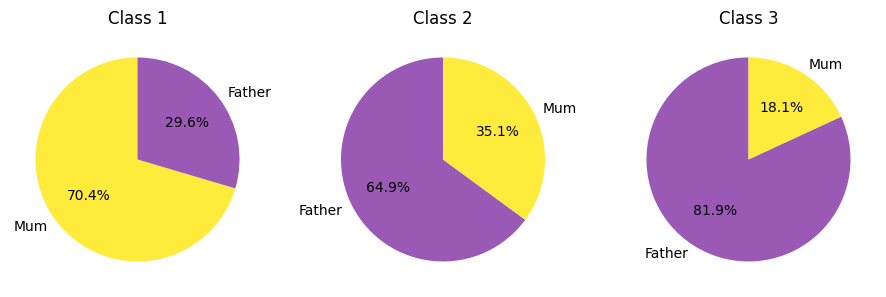

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(9, 7))
color = {'Father':'#9b59b6','Mum':'#ffeb3b'}  # 순서대로 보라, 노랑

for i, n in enumerate([1, 2, 3]):
    df_class = df[df['Class'] == n]

    relation_counts = df_class['Relation'].value_counts()

    colors = [color[relation] for relation in relation_counts.index]

    axes[i].pie(relation_counts, labels=relation_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(f'Class {n}')

plt.tight_layout()
plt.show()

In [ ]:
# 데이터 확인
count_1 = (df['Class'] == 1).sum()
count_2 = (df['Class'] == 2).sum()
count_3 = (df['Class'] == 3).sum()

print(count_1)
print(count_2)
print(count_3)

142
211
127


In [ ]:
filtered_df = df[(df['Relation'] == 'Mum') & (df['Class'] == 1)][['Relation', 'Class']]
filtered_df

,Relation,Class
14,Mum,1
19,Mum,1
47,Mum,1
48,Mum,1
53,Mum,1
...,...,...
449,Mum,1
464,Mum,1
465,Mum,1
466,Mum,1


> 가설1. 책임이 있는 부모가 엄마로 입력되어 있는 학생의 성적이 더 높다. (채택)

In [ ]:
contingency_table = pd.crosstab(df['Relation'], df['Class'])

# 카이제곱 검정
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-squared Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# 유의미한 차이가 있는지 확인
if p_value < 0.05:
    print("✅ 학부모와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)")
else:
    print("❌ 학부모와 성적 간에 통계적으로 유의미한 관계가 존재하지 않음 (p >= 0.05)")

Chi-squared Statistic: 81.366
P-value: 0.00000
✅ 학부모와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)


### [추가] 부모-자녀 성별과 성적이 유의미한 관계를 보일까? <br>
➡ 부자(MFather), 부녀(FFather), 모자(MMum), 모녀(FMum)

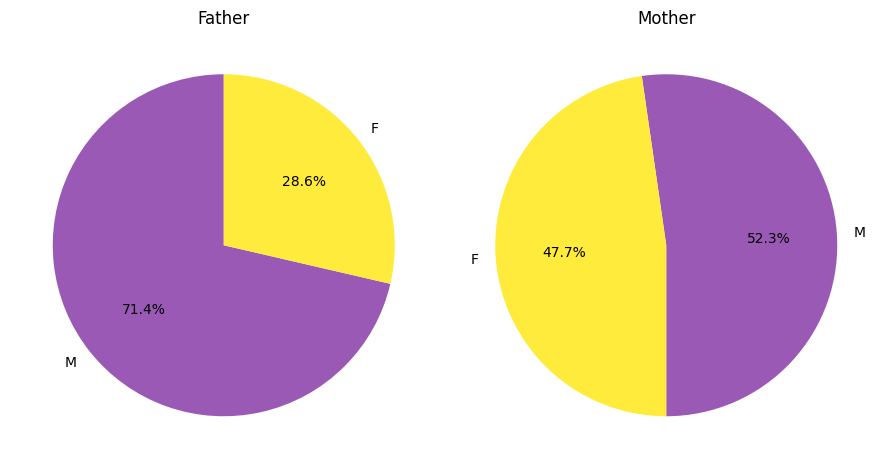

In [ ]:
df_male = df[df['Relation'] == 'Father']
df_female = df[df['Relation'] == 'Mum']

category_counts_male = df_male['gender'].value_counts()
category_counts_female = df_female['gender'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(9, 7))

# 아버지 파이 차트
axes[0].pie(category_counts_male, labels=category_counts_male.index, autopct='%1.1f%%', startangle=90, colors=['#9b59b6', '#ffeb3b'])
axes[0].set_title('Father')

# 어머니 파이 차트
axes[1].pie(category_counts_female, labels=category_counts_female.index, autopct='%1.1f%%', startangle=-90, colors=['#9b59b6', '#ffeb3b'])
axes[1].set_title('Mother')

plt.tight_layout()
plt.show()

In [ ]:
df['Family'] = df['gender'] + df['Relation']
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Family
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,2,MFather
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,2,MFather
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,3,MFather
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,3,MFather
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,2,MFather
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,3,FFather
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,2,FFather
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,2,FFather
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,3,FFather


In [ ]:
df[['Family','Class']]

,Family,Class
0,MFather,2
1,MFather,2
2,MFather,3
3,MFather,3
4,MFather,2
...,...,...
475,FFather,3
476,FFather,2
477,FFather,2
478,FFather,3


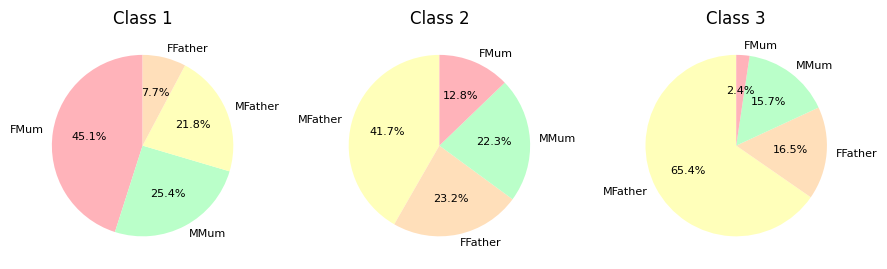

In [ ]:
import matplotlib.pyplot as plt

color = {'FFather':'#FFDFBA', 'FMum':'#FFB3BA', 'MFather':'#FFFFBA', 'MMum':'#BAFFC9'}

fig, axes = plt.subplots(1, 3, figsize=(9, 7))

for i, n in enumerate([1, 2, 3]):
    df_class = df[df['Class'] == n]

    relation_counts = df_class['Family'].value_counts()

    colors = [color[relation] for relation in relation_counts.index]

    wedges, texts, autotexts = axes[i].pie(
        relation_counts,
        labels=relation_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )

    axes[i].set_title(f'Class {n}')

    for text in texts + autotexts:
        text.set_fontsize(8)  # 라벨과 비율 텍스트의 폰트 크기 설정


plt.tight_layout()
plt.show()

In [ ]:
# 각 범주형 변수 간의 교차표 생성
contingency_1 = pd.crosstab(df['Relation'], df['Class'])
contingency_2 = pd.crosstab(df['Relation'], df['gender'])
contingency_3 = pd.crosstab(df['Class'], df['gender'])

# 카이제곱 검정 수행
chi2_stat_1, p_value_1, dof_1, expected_1 = stats.chi2_contingency(contingency_1)
chi2_stat_2, p_value_2, dof_2, expected_2 = stats.chi2_contingency(contingency_2)
chi2_stat_3, p_value_3, dof_3, expected_3 = stats.chi2_contingency(contingency_3)

# 결과 출력
print(f"Chi-squared Statistic (Relation vs Class): {chi2_stat_1:.3f}, P-value: {p_value_1:.5f}")
print(f"Chi-squared Statistic (Relation vs gender): {chi2_stat_2:.3f}, P-value: {p_value_2:.5f}")
print(f"Chi-squared Statistic (Class vs gender): {chi2_stat_3:.3f}, P-value: {p_value_3:.5f}")

# 유의미한 차이가 있는지 확인
for idx, p_value in enumerate([p_value_1, p_value_2, p_value_3], 1):
    if p_value < 0.05:
        print(f"✅ 변수 {idx}의 관계에 통계적으로 유의미한 차이가 있음 (p < 0.05)")
    else:
        print(f"❌ 변수 {idx}의 관계에 통계적으로 유의미한 차이가 없음 (p >= 0.05)")

Chi-squared Statistic (Relation vs Class): 81.366, P-value: 0.00000
Chi-squared Statistic (Relation vs gender): 17.464, P-value: 0.00003
Chi-squared Statistic (Class vs gender): 33.326, P-value: 0.00000
✅ 변수 1의 관계에 통계적으로 유의미한 차이가 있음 (p < 0.05)
✅ 변수 2의 관계에 통계적으로 유의미한 차이가 있음 (p < 0.05)
✅ 변수 3의 관계에 통계적으로 유의미한 차이가 있음 (p < 0.05)


In [ ]:
contingency_table = pd.crosstab(df['Family'], df['Class'])

# 카이제곱 검정
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-squared Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# 유의미한 차이가 있는지 확인
if p_value < 0.05:
    print("✅ 학부모-자녀와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)")
else:
    print("❌ 학부모-자녀와 성적 간에 통계적으로 유의미한 관계가 존재하지 않음 (p >= 0.05)")

Chi-squared Statistic: 116.546
P-value: 0.00000
✅ 학부모-자녀와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)


-----------------
### 가설2. 학부모가 학교에 만족할수록 학생 성적이 높다.

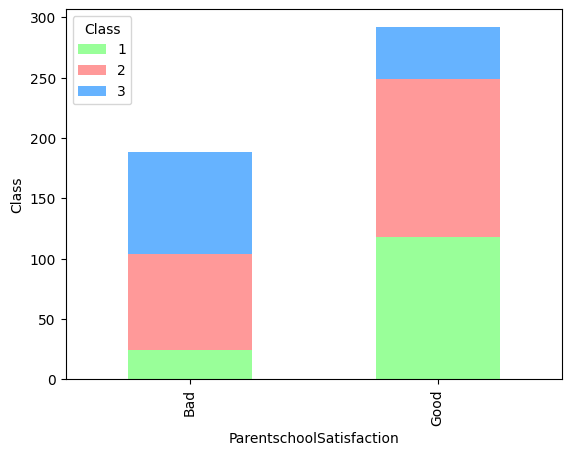

In [ ]:
Satisfaction = pd.crosstab(df['ParentschoolSatisfaction'], df['Class'])
Satisfaction.plot(kind='bar', stacked=True, color=['#99ff99', '#ff9999', '#66b3ff'])

plt.xlabel('ParentschoolSatisfaction')
plt.ylabel('Class')
plt.show()

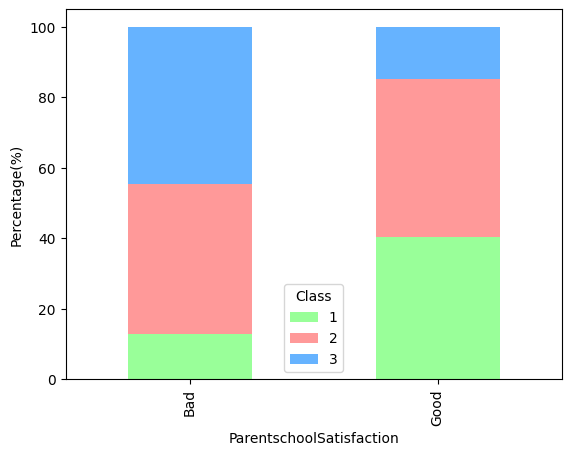

In [ ]:
Satisfaction = pd.crosstab(df['ParentschoolSatisfaction'], df['Class'])
Satisfaction_ratio = Satisfaction.div(Satisfaction.sum(axis=1), axis=0)
Satisfaction_percentage = Satisfaction_ratio * 100
Satisfaction_percentage.plot(kind='bar', stacked=True, color=['#99ff99', '#ff9999', '#66b3ff'])

plt.xlabel('ParentschoolSatisfaction')
plt.ylabel('Percentage(%)')

plt.show()

> 가설2. 학부모가 학교에 만족할수록 학생 성적이 높다. (채택) <br>


'자신의 자녀의 성적이 잘 나오니 학교에 만족하는 것이 아닐까?' 의문 有<br>
즉... "학생 성적이 높을수록 학부모가 학교에 만족한다." 라는 가설이 더 올바를 수 있음

In [ ]:
contingency_table = pd.crosstab(df['ParentschoolSatisfaction'], df['Class'])

# 카이제곱 검정
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print('카이제곱 검정 결과:')
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# 유의미한 차이가 있는지 확인
if p_value < 0.05:
    print("✅ 학부모의 만족도와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)")
else:
    print("❌ 학부모의 만족도와 성적 간에 통계적으로 유의미한 관계가 존재하지 않음 (p >= 0.05)")

카이제곱 검정 결과:
Chi-Square Test Statistic: 68.4695169021438
P-value: 1.3552933750373137e-15
✅ 학부모의 만족도와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)
